# EDA - 1 - Bike Details Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BIKE DETAILS.csv')

1. What is the range of selling prices in the dataset?

In [5]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
# Range of selling prices
price_range = max_price - min_price
print("Minimum selling price:", min_price)
print("Maximum selling price:", max_price)
print("Range of selling prices:", price_range)


Minimum selling price: 5000
Maximum selling price: 760000
Range of selling prices: 755000


2. What is the median selling price for bikes in the dataset?

In [6]:
median_price = df['selling_price'].median()
print("Median selling price:", median_price)

Median selling price: 45000.0


3. What is the most common seller type?

In [8]:
most_common_seller = df['seller_type'].mode()[0]
print("Most common seller type:", most_common_seller)

Most common seller type: Individual


4. How many bikes have driven more than 50,000 kilometers?

In [9]:
count_over_50000 = (df['km_driven'] > 50000).sum()
print("Number of bikes driven more than 50,000 km:", count_over_50000)

Number of bikes driven more than 50,000 km: 170


5. What is the average km_driven value for each ownership type?

In [10]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. What proportion of bikes are from the year 2015 or older?

In [38]:
count_2015_or_older = (df['year'] <= 2015).sum()
total_bikes = len(df)
# Proportion (fraction)
proportion = count_2015_or_older / total_bikes
print("Proportion of bikes from 2015 or older:", proportion)

Proportion of bikes from 2015 or older: 0.5664467483506126


7. What is the trend of missing values across the dataset?

In [40]:
missing = df.isnull().sum()
print(missing)


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
age                    0
depreciation         435
dtype: int64


8. What is the highest ex_showroom_price recorded, and for which bike?

In [41]:
# Get the row with the highest ex_showroom_price
max_row = df.loc[df['ex_showroom_price'].idxmax()]

# Extract values
highest_price = max_row['ex_showroom_price']
bike_name = max_row['name']

print("Highest ex_showroom_price:", highest_price)
print("Bike with highest ex_showroom_price:", bike_name)

Highest ex_showroom_price: 1278000.0
Bike with highest ex_showroom_price: Harley-Davidson Street Bob


9. What is the total number of bikes listed by each seller type?

In [42]:
seller_counts = df['seller_type'].value_counts()
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10.  What is the relationship between selling_price and km_driven for first-owner bikes?

In [44]:
first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print("Correlation:", correlation)

Correlation: nan


11.  Identify and remove outliers in the km_driven column using the IQR method.

In [23]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print("Number of outliers:", len(outliers))

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("Original rows:", len(df))
print("Rows after removing outliers:", len(df_no_outliers))

Lower bound: -30750.0
Upper bound: 87250.0
Number of outliers: 39
Original rows: 1061
Rows after removing outliers: 1022


12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

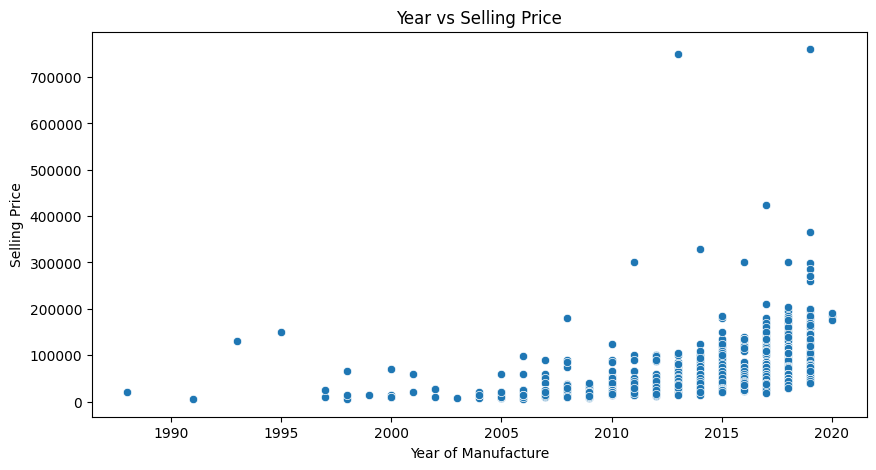

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title("Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [47]:
# 1. Create an AGE column
current_year = 2024
df['age'] = current_year - df['year']
# 2. Calculate depreciation amount
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
# 3. Average depreciation by age
avg_depreciation = df.groupby('age')['depreciation'].mean()
print(avg_depreciation)

age
4    -34260.000000
5      2954.562500
6     13023.194805
7     22306.082353
8     28328.190476
9     28013.275000
10    34505.606061
11    43086.886792
12    37317.648649
13    47102.666667
14    45658.928571
15    38227.785714
16    54732.428571
17    42399.000000
18    39664.500000
19    44852.000000
20    36852.000000
21             NaN
22             NaN
23    34852.000000
24             NaN
25             NaN
26             NaN
27             NaN
29             NaN
31             NaN
33             NaN
36             NaN
Name: depreciation, dtype: float64


14. Which bike names are priced significantly above the average price for their manufacturing year?

In [48]:
# 1. Calculate average selling price per manufacturing year
year_avg_price = df.groupby('year')['selling_price'].mean().reset_index()
year_avg_price.columns = ['year', 'avg_price_for_year']
# 2. Merge this back to the original dataframe
df_merged = df.merge(year_avg_price, on='year')
# 3. Calculate price difference
df_merged['price_above_avg'] = df_merged['selling_price'] - df_merged['avg_price_for_year']
# 4. Filter bikes significantly above average
significantly_higher = df_merged[df_merged['price_above_avg'] > 0]
# 5. Show bike names and their deviations
result = significantly_higher[['name', 'year', 'selling_price', 'avg_price_for_year', 'price_above_avg']]
print(result)

                                      name  year  selling_price  \
0                Royal Enfield Classic 350  2019         175000   
2      Royal Enfield Classic Gunmetal Grey  2018         150000   
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000   
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                           Yamaha YZF R3  2019         365000   
...                                    ...   ...            ...   
1004                  Bajaj Pulsar  NS 200  2016          60000   
1005                    TVS Apache RTR 160  2014          60000   
1008                    Bajaj Pulsar 220 F  2012          52000   
1012                   Bajaj Pulsar NS 200  2014          50000   
1023                Bajaj Avenger 220 dtsi  2012          45000   

      avg_price_for_year  price_above_avg  
0          119689.511628     55310.488372  
2           87660.374046     62339.625954  
3           56500.000000      8500.000000  
7           34289.2

15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

                   selling_price      year  km_driven  ex_showroom_price  \
selling_price           1.000000  0.402188  -0.212937           0.918583   
year                    0.402188  1.000000  -0.288675           0.126378   
km_driven              -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000   
age                    -0.402188 -1.000000   0.288675          -0.126378   
depreciation            0.345663 -0.343490   0.066531           0.688385   

                        age  depreciation  
selling_price     -0.402188      0.345663  
year              -1.000000     -0.343490  
km_driven          0.288675      0.066531  
ex_showroom_price -0.126378      0.688385  
age                1.000000      0.343490  
depreciation       0.343490      1.000000  


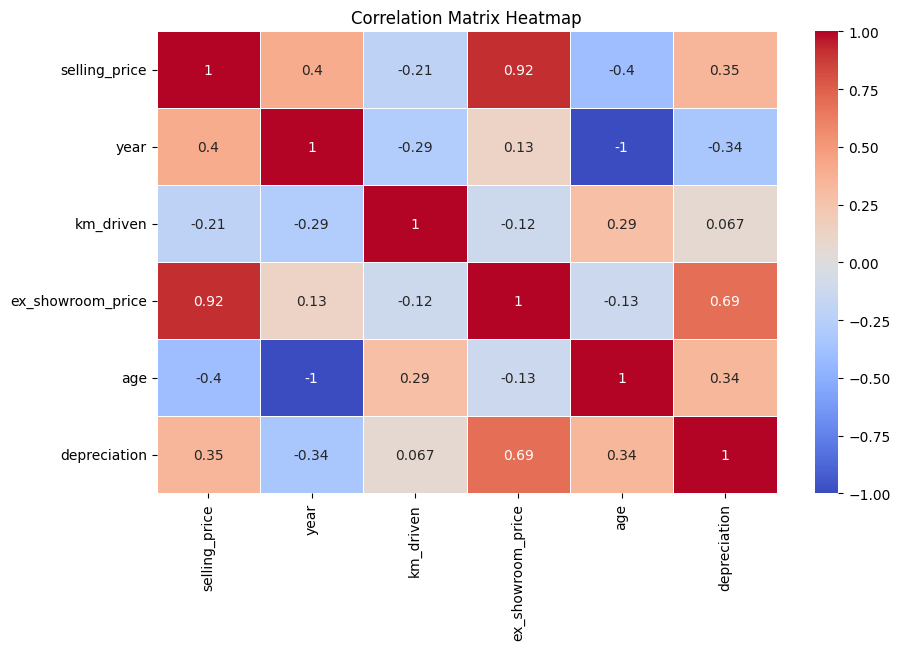

In [49]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# EDA - 2 - Car Sale Dataset

In [31]:
df2 = pd.read_csv("Car Sale.csv")


1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [33]:
avg_price_by_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_dealer)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [53]:
price_variation = df2.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(price_variation)
highest_var_company = price_variation.idxmax()
highest_var_value = price_variation.max()

print("Company with highest price variation:", highest_var_company)
print("Standard deviation:", highest_var_value)


Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64
Company with highest price variation: Lincoln
Standard deviation: 19658.050211265567


3.  What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

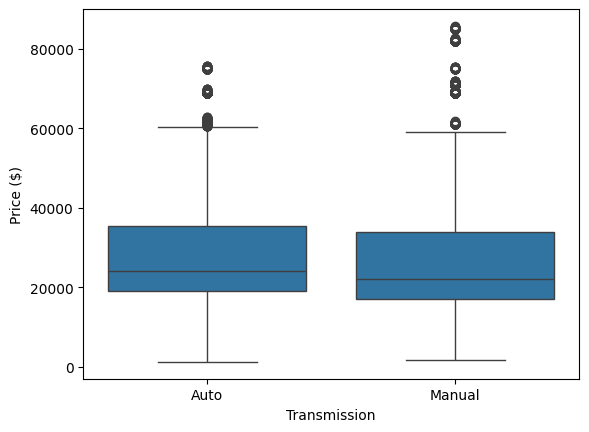

In [55]:
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.show()

4. What is the distribution of car prices across different regions?

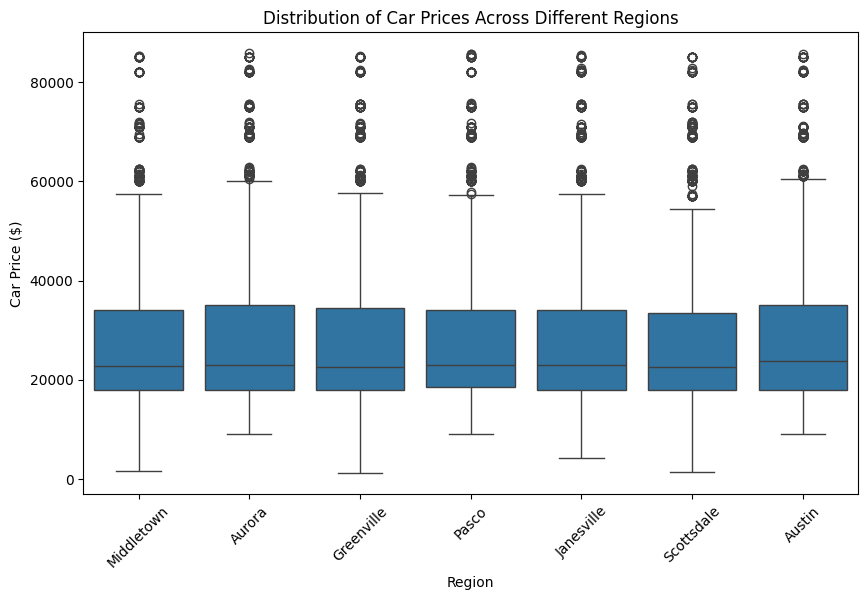

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2, x='Dealer_Region', y='Price ($)')
plt.title("Distribution of Car Prices Across Different Regions")
plt.xlabel("Region")
plt.ylabel("Car Price ($)")
plt.xticks(rotation=45)
plt.show()

5. What is the distribution of cars based on body styles?

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


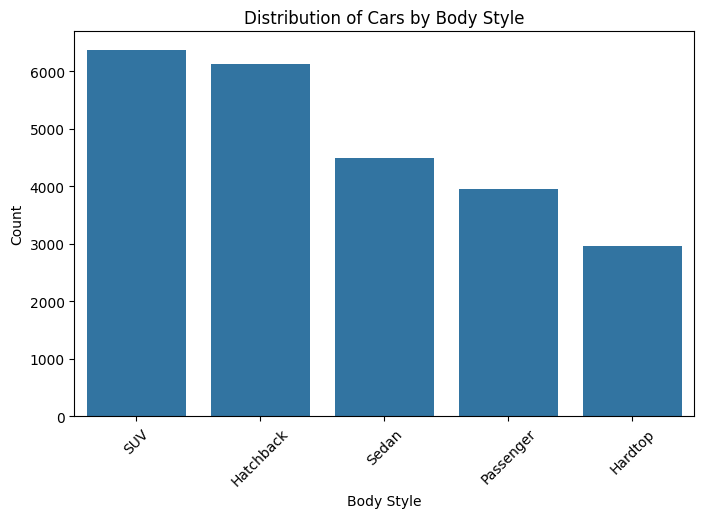

In [58]:
# Count of cars by body style
body_style_counts = df2['Body Style'].value_counts()
print(body_style_counts)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df2, x='Body Style', order=body_style_counts.index)
plt.title("Distribution of Cars by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


6. How does the average selling price of cars vary by customer gender and annual income?

Average Price by Gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


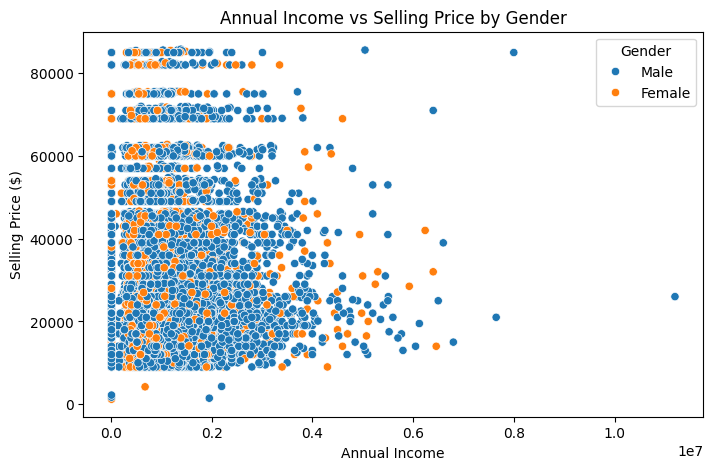

In [60]:
# Average selling price by gender
avg_price_by_gender = df2.groupby('Gender')['Price ($)'].mean()
print("Average Price by Gender:\n", avg_price_by_gender)

# Relationship between annual income and selling price (scatterplot)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df2, x='Annual Income', y='Price ($)', hue='Gender')
plt.title("Annual Income vs Selling Price by Gender")
plt.xlabel("Annual Income")
plt.ylabel("Selling Price ($)")
plt.show()


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [65]:
price_region = df2.groupby('Dealer_Region')['Price ($)'].mean()
count_region = df2['Dealer_Region'].value_counts()
print("Average Price by Region:\n", price_region)
print("\nNumber of Cars Sold by Region:\n", count_region)

Average Price by Region:
 Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64

Number of Cars Sold by Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


8.  How does the average car price differ between cars with different engine sizes?

In [63]:
# Average price grouped by engine size
avg_price_by_engine = df2.groupby('Engine')['Price ($)'].mean()
print(avg_price_by_engine)


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


9. How do car prices vary based on the customer’s annual income bracket?

In [66]:
# Create income brackets (you can adjust ranges)
df2['Income_Bracket'] = pd.cut(df2['Annual Income'],
                               bins=[0, 30000, 60000, 90000, 150000],
                               labels=['Low', 'Medium', 'High', 'Very High'])

# Average price per income bracket
avg_price_by_income = df2.groupby('Income_Bracket')['Price ($)'].mean()
print(avg_price_by_income)

Income_Bracket
Low          27884.29782
Medium               NaN
High         43000.00000
Very High    23200.20000
Name: Price ($), dtype: float64


/tmp/ipython-input-2701882856.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df2.groupby('Income_Bracket')['Price ($)'].mean()


10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Top 5 car models by number of sales
top5_models = df2['Model'].value_counts().head(5)
print("Top 5 car models:\n", top5_models)

# 2. Filter dataset for only these models
df_top5 = df2[df2['Model'].isin(top5_models.index)]

Top 5 car models:
 Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


11.  How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

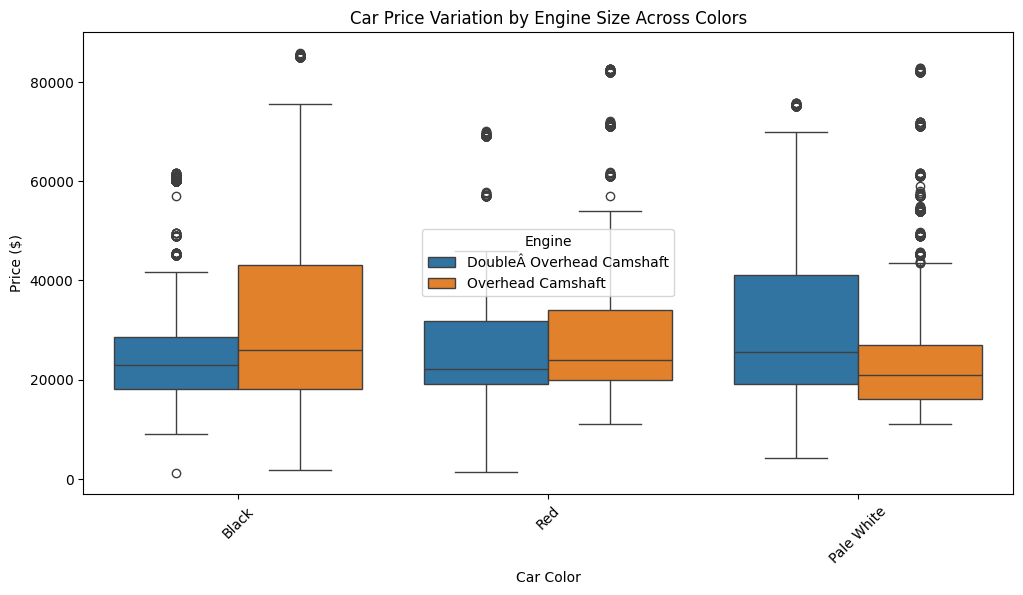

Price Variation by Color:
 Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

Color(s) with highest variation in price:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [68]:
# 1. Visualize how price varies with engine size across colors
plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='Color', y='Price ($)', hue='Engine')
plt.title("Car Price Variation by Engine Size Across Colors")
plt.xlabel("Car Color")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

# 2. Find price variation (std deviation) for each color
price_variation_by_color = df2.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Price Variation by Color:\n", price_variation_by_color)

# 3. Identify colors with highest variation
print("\nColor(s) with highest variation in price:")
print(price_variation_by_color.head())


12.  Is there any seasonal trend in car sales based on the date of sale?


Car Sales by Month:
 Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


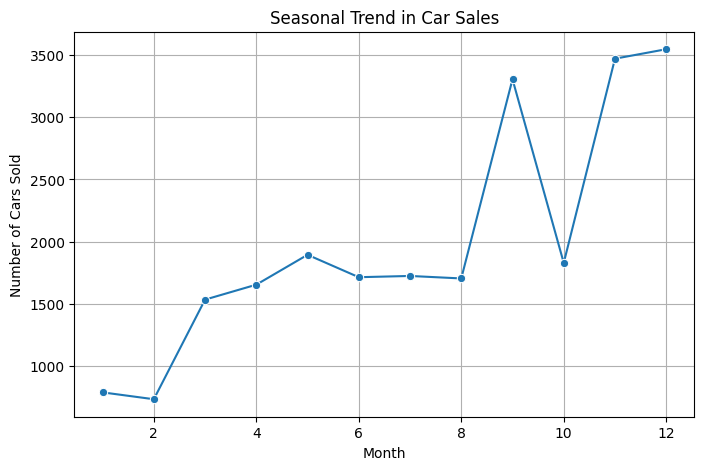

In [69]:
# Convert date column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])
# Extract month
df2['Month'] = df2['Date'].dt.month

# Count sales per month
monthly_sales = df2['Month'].value_counts().sort_index()
print("Car Sales by Month:\n", monthly_sales)

# Plot seasonal trend
plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Seasonal Trend in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.grid(True)
plt.show()

13.  How does the car price distribution change when considering different combinations of body style and
transmission type?

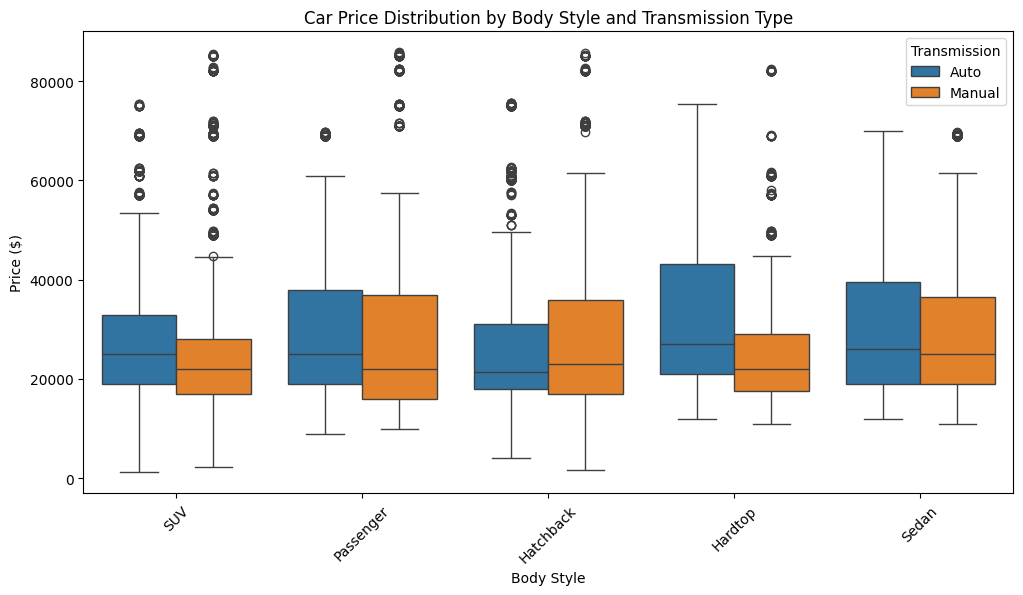

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='Body Style', y='Price ($)', hue='Transmission')
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()


14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

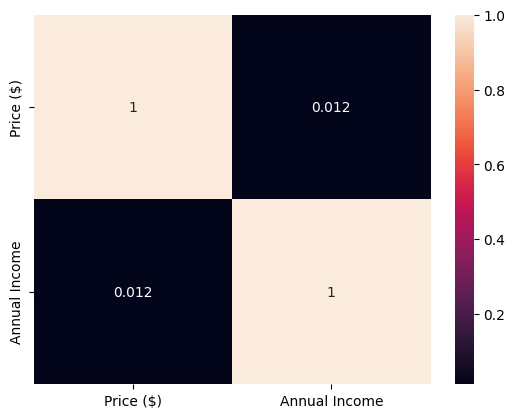

In [114]:
sns.heatmap(df2[['Price ($)','Annual Income']].corr(), annot=True)
plt.show()

15.  How does the average car price vary across different car models and engine types?

In [79]:
avg_price_model_engine = df2.groupby(['Model','Engine'])['Price ($)'].mean()
print(avg_price_model_engine)

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


# EDA - 3

In [81]:

df3 = pd.read_csv("amazon.csv")

1. What is the average rating for each product category?

In [84]:
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
avg_rating_by_category = df3.groupby('category')['rating'].mean()
print(avg_rating_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

2. What are the top rating_count products by category?

In [85]:
top_products = df3.sort_values('rating_count', ascending=False).groupby('category').head(1)
print(top_products[['category', 'product_name', 'rating_count']])


                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  P

3. What is the distribution of discounted prices vs. actual prices?

In [87]:
print(df3[['discounted_price', 'actual_price']].describe())


       discounted_price actual_price
count              1465         1465
unique              550          449
top                ₹199         ₹999
freq                 53          120


4. How does the average discount percentage vary across categories?

In [97]:
avg_discount_by_category = df3.groupby('category')['discount_percentage'].mean()
print(avg_discount_by_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

5.  What are the most popular product names?

In [89]:
popular_products = df3.sort_values('rating_count', ascending=False).head(10)
print(popular_products[['product_name', 'rating_count']])


                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


6. What are the most popular product keywords

In [92]:
# Count keyword frequency
keyword_counts = df3['about_product'].str.split().explode().value_counts().head(20)
print(keyword_counts)


about_product
and     5003
the     3553
to      3551
with    2805
for     2275
of      2013
your    1722
a       1702
|       1431
is      1425
in      1143
you     1081
or       910
&        894
on       890
USB      871
can      833
The      764
from     728
-        680
Name: count, dtype: int64


7. What are the most popular product reviews?

In [93]:
top_reviews = df3.sort_values('rating_count', ascending=False)[['product_name', 'review_content', 'rating_count']].head(10)
print(top_reviews)


                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
977   Sennheiser CX 80S in-Ear Wired Headphones with...   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...   
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...   
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...   

                                         review_content rating_count  
1279  Does the job well,doesn't work on sand. though...          992  
750   Nive,very good batteries received,Like,Good pr...          989  
977   For those looking for a genuine review & a bri...       98,250  
1059  Bottle quality is not good.,Best for hot water...          9

8. What is the correlation between discounted_price and rating?

In [98]:
# Clean price column (remove currency symbol and commas)
df3['discounted_price'] = (
    df3['discounted_price'].astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Compute correlation
correlation = df3['discounted_price'].corr(df3['rating'])
print("Correlation between discounted price and rating:", correlation)


Correlation between discounted price and rating: 0.12033741712288548


9. What are the Top 5 categories based on the highest ratings?

In [95]:
top5_categories = df3.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top5_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


10.  Identify any potential areas for improvement or optimization based on the data analysis.

In [96]:
suggestions = """
- Fix missing review values
- Remove duplicate products
- Normalize price columns
- Extract sentiment from reviews
"""
print(suggestions)


- Fix missing review values
- Remove duplicate products
- Normalize price columns
- Extract sentiment from reviews



# EDA - 4

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [101]:
df4 = pd.read_csv("spotify.csv")   # update your filename

# Check nulls
print(df4.isnull().sum())

# Drop nulls if present
df4 = df4.dropna()

# Check duplicates
duplicates = df4.duplicated().sum()
print("Duplicate rows:", duplicates)

# Drop duplicates if present
df4 = df4.drop_duplicates()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

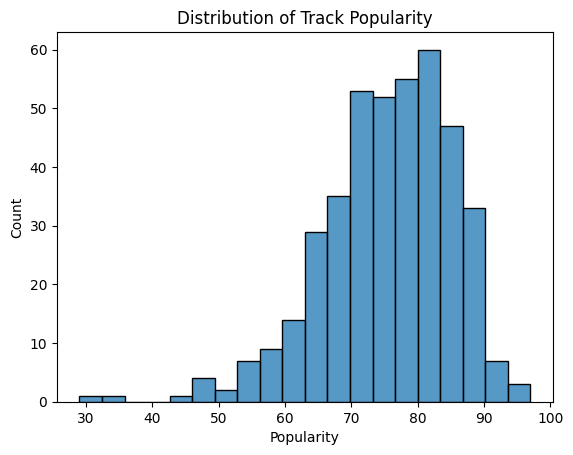

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df4['Popularity'], bins=20)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

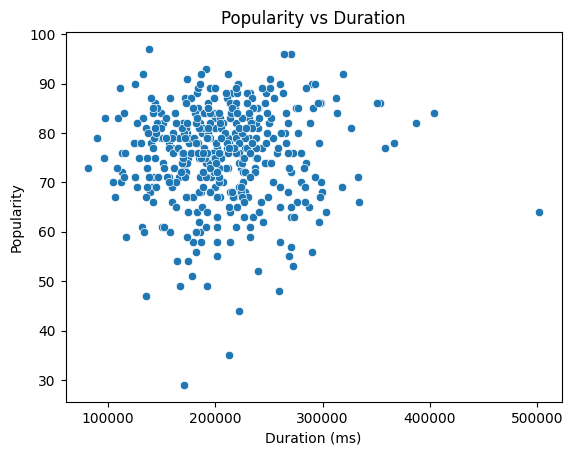

In [103]:
sns.scatterplot(data=df4, x='Duration (ms)', y='Popularity')
plt.title("Popularity vs Duration")
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

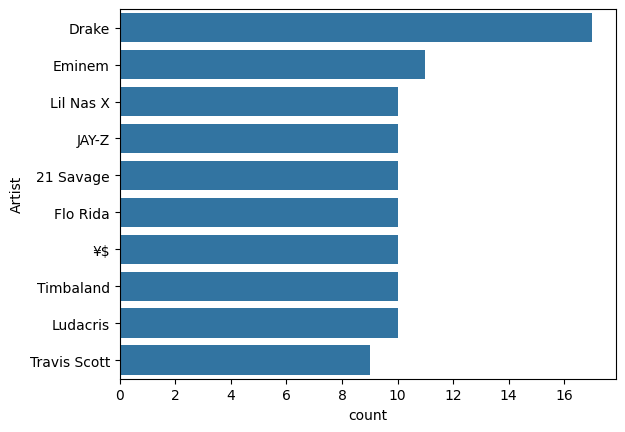

In [105]:
artist_count = df4['Artist'].value_counts()
sns.countplot(y=df4['Artist'], order=df4['Artist'].value_counts().head(10).index)
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [106]:
least_popular = df4.nsmallest(5, 'Popularity')
print(least_popular[['Artist', 'Track Name', 'Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6.  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [107]:
# Find top 5 most frequent artists
top_artists = df4['Artist'].value_counts().head(5).index

# Filter
df_top = df4[df4['Artist'].isin(top_artists)]

# Average popularity
avg_pop = df_top.groupby('Artist')['Popularity'].mean()
print(avg_pop)


Artist
21 Savage    83.800000
Drake        82.882353
Eminem       83.636364
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [108]:
top_tracks = df_top.sort_values(['Artist', 'Popularity'], ascending=[True, False])
most_popular_by_artist = top_tracks.groupby('Artist').head(1)
print(most_popular_by_artist[['Artist', 'Track Name', 'Popularity']])


        Artist                               Track Name  Popularity
70   21 Savage                                   redrum          96
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
100      JAY-Z                          Ni**as In Paris          86
312  Lil Nas X                        THATS WHAT I WANT          81


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.


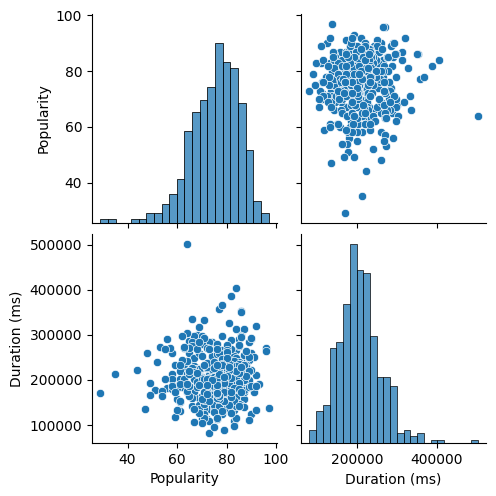

In [109]:
sns.pairplot(df4[['Popularity', 'Duration (ms)']])
plt.show()


9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

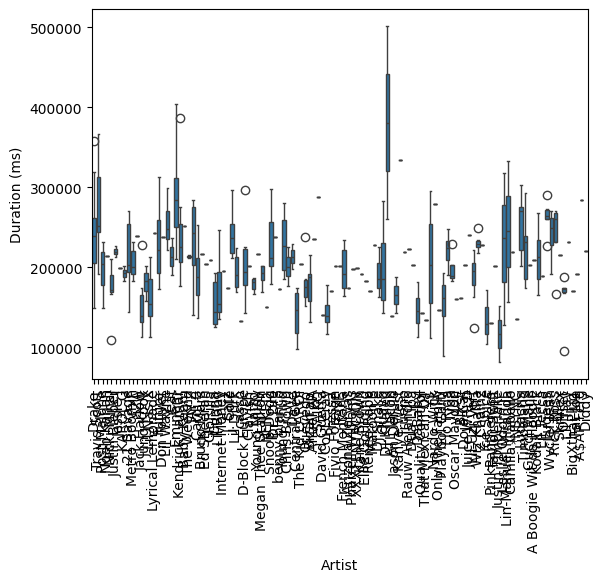

In [110]:
sns.boxplot(data=df4, x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)
plt.show()


10.  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

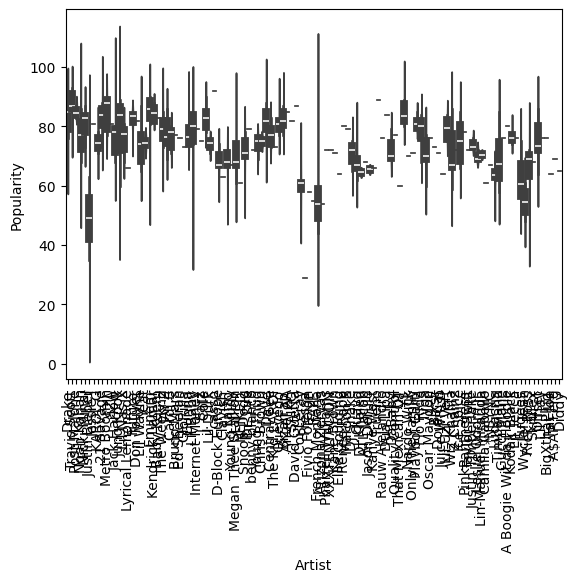

In [111]:
sns.violinplot(data=df4, x='Artist', y='Popularity')
plt.xticks(rotation=90)
plt.show()
